In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

In [2]:
# My goal in this project is to predict cost of the trip

In [3]:
data=pd.read_csv(r"../input/city-taxi-trip-pricing-and-distances/Cab_Data.csv")

In [4]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
                                  # Exploratory Data Analysis #

In [6]:
                                        # Analyze form #

In [7]:
# copy data
df=data.copy()
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
# Target variable
           ## my target variable is "Cost of Trip"

In [9]:
# shape
df.shape

(359392, 7)

In [10]:
             ## we have 359392 rows and 7 columns

In [11]:
# types of variables
df.dtypes.value_counts()

float64    3
int64      2
object     2
dtype: int64

In [12]:
         ## we have 2 qualitatives,3 continuous quantitatives and 2 discrete quantitative variables

In [13]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [14]:
        ## is no missing values 

In [15]:
                                        # Background Analysis #

In [16]:
# statistical analysis
df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [17]:
# correlation 
df.corr()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000


<AxesSubplot:>

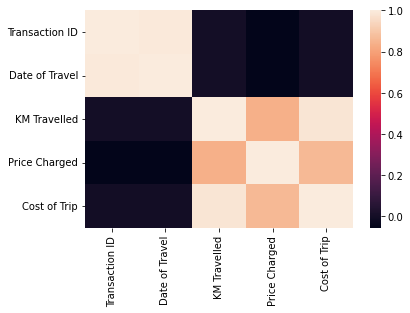

In [18]:
# visualize correlation
sns.heatmap(df.corr())

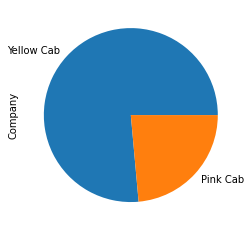

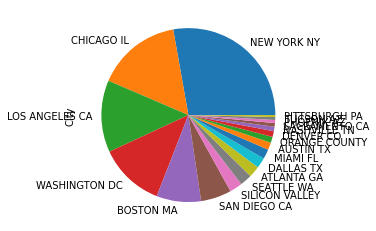

In [19]:
# qualitatives variables visualisation
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    

<Figure size 432x288 with 0 Axes>

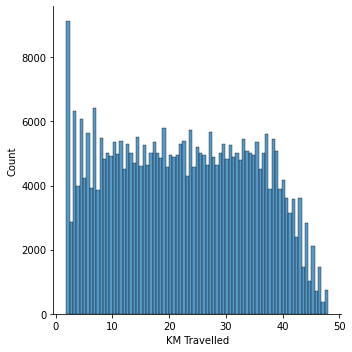

<Figure size 432x288 with 0 Axes>

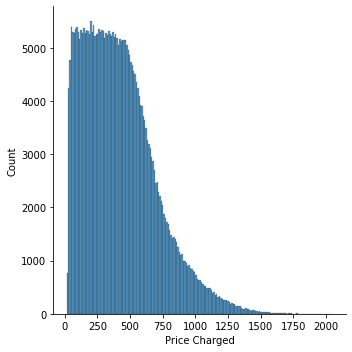

<Figure size 432x288 with 0 Axes>

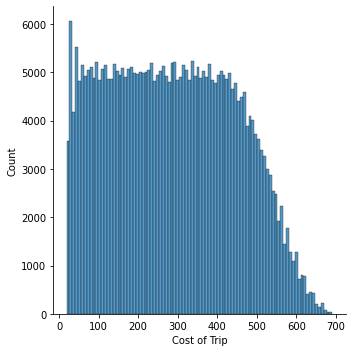

In [20]:
# quantitative variables visualisation
for col in df.select_dtypes("float"):
    plt.figure()
    sns.displot(df[col])

In [21]:
                                    # Preprocessing and first modelling #

In [22]:
# Sklearn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer,LabelEncoder,Normalizer,OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error

In [23]:
# create trainset and testset
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [24]:
# create X_train,y_train,X_test,y_test
def prepro(df):
    X=df.drop("Cost of Trip",axis=1)
    y=df["Cost of Trip"]
    return X,y

In [25]:
X_train,y_train=prepro(trainset)

In [26]:
X_test,y_test=prepro(testset)

In [27]:
# preprocessing df
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)
numerical_pipeline=make_pipeline(StandardScaler())
categorical_pipeline=make_pipeline(OneHotEncoder())
preprocessing=make_column_transformer((categorical_pipeline,categorical_features),(numerical_pipeline,numerical_features))

In [28]:
# create first model
linear_regression=make_pipeline(preprocessing,LinearRegression())

In [29]:
# create evaluation function
def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print("max_error:",max_error(y_test,ypred))
    print("mean_absolute_error:",mean_absolute_error(y_test,ypred))
    print("root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,ypred)))
    print("model_score:",model.score(X_test,y_test))
    
    
    

In [30]:
# test first model
evaluation(linear_regression)

max_error: 88.18327289238505
mean_absolute_error: 16.541466409174976
root_mean_squared_error: 20.96211392767976
model_score: 0.9824848831426913


In [31]:
# my conclusion
    ## my first model have 98% performance i think it'is very good.